In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

In [2]:
df = pd.read_csv('cleaned_googleplaystore_data(1).csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated Date,Last Updated Month,Last Updated Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,2018-01-07,January,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,2018-01-15,January,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,2018-08-01,August,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,2018-06-08,June,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,2018-06-20,June,2018.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10839 entries, 0 to 10838
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 10839 non-null  object 
 1   Category            10839 non-null  object 
 2   Rating              10839 non-null  float64
 3   Reviews             10839 non-null  float64
 4   Size                10839 non-null  float64
 5   Installs            10839 non-null  float64
 6   Type                10839 non-null  object 
 7   Price               10839 non-null  float64
 8   Content Rating      10839 non-null  object 
 9   Last Updated Date   10839 non-null  object 
 10  Last Updated Month  10839 non-null  object 
 11  Last Updated Year   10839 non-null  float64
dtypes: float64(6), object(6)
memory usage: 1016.3+ KB


In [4]:
df.isnull().sum()

App                   0
Category              0
Rating                0
Reviews               0
Size                  0
Installs              0
Type                  0
Price                 0
Content Rating        0
Last Updated Date     0
Last Updated Month    0
Last Updated Year     0
dtype: int64

In [5]:
df.shape

(10839, 12)

In [6]:
cmap = plt.colormaps['Set1']
colors = cmap(np.linspace(0, 1, 10))

##### Converting type of some columns

In [7]:
df['Last Updated Date'] = pd.to_datetime(df['Last Updated Date'])
df['Category'] = df['Category'].astype('category')
df['Installs'] = df['Installs'].astype(int)
df.dtypes

App                           object
Category                    category
Rating                       float64
Reviews                      float64
Size                         float64
Installs                       int64
Type                          object
Price                        float64
Content Rating                object
Last Updated Date     datetime64[ns]
Last Updated Month            object
Last Updated Year            float64
dtype: object

##### Dropping Duplicates

In [8]:
df = df.drop_duplicates(subset='App')
df.shape

(9658, 12)

# **Finding Key Insights from Google Play Store Dataset**

## **App Popularity & User Engagement**

##### Which app category has the most apps listed?

In [9]:
df['Category'].value_counts().head()

Category
FAMILY      1831
GAME         959
TOOLS        827
BUSINESS     420
MEDICAL      395
Name: count, dtype: int64

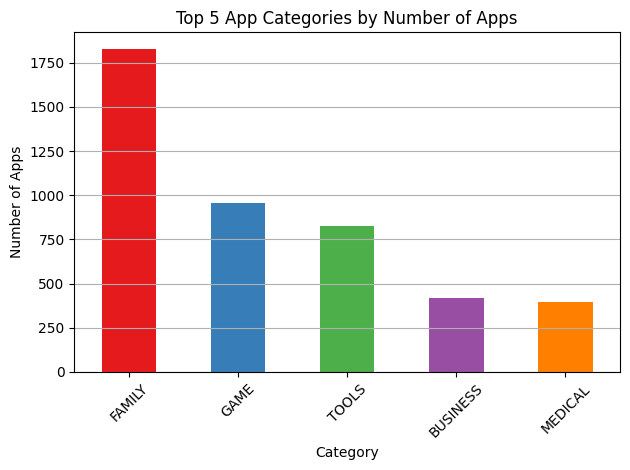

In [10]:
df['Category'].value_counts().head().plot(kind='bar', color=colors)
plt.title('Top 5 App Categories by Number of Apps')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### Which app has the highest number of installs overall?

In [11]:
top_installed_apps = df.sort_values(by='Installs', ascending=False).head()
print(top_installed_apps[['App', 'Installs']])

                    App    Installs
865   Google Play Games  1000000000
1654     Subway Surfers  1000000000
3736        Google News  1000000000
3665            YouTube  1000000000
152   Google Play Books  1000000000


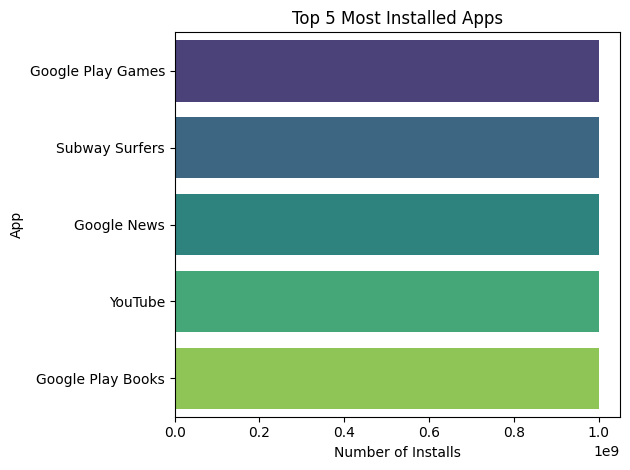

In [12]:
sns.barplot(data=top_installed_apps, x='Installs', y='App', palette='viridis')
plt.title('Top 5 Most Installed Apps')
plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.tight_layout()
plt.show()

##### Which category has the most apps with 1M+ installs?

In [13]:
filtered_df = df[df['Installs'] >= 1_000_000]
category_counts = filtered_df['Category'].value_counts()
most_common_category = category_counts.idxmax()
most_common_count = category_counts.max()

print(f"The category with the most apps having 1M+ installs is '{most_common_category}' with {most_common_count} apps.")

The category with the most apps having 1M+ installs is 'GAME' with 553 apps.


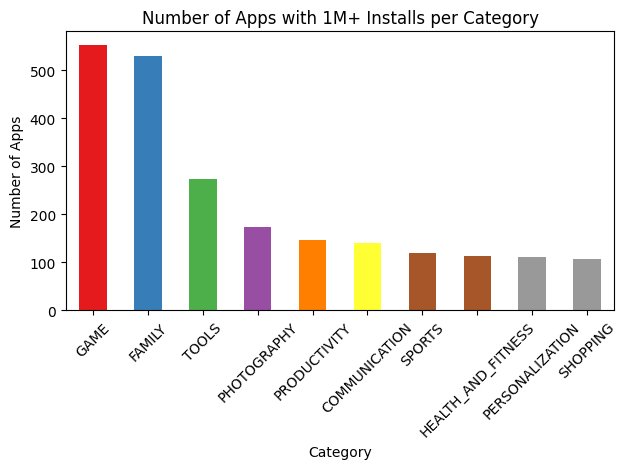

In [14]:
category_counts.head(10).plot(kind='bar', color=colors)
plt.title('Number of Apps with 1M+ Installs per Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Which app has received the most reviews?

In [15]:
top_review_apps = df.sort_values(by='Reviews', ascending=False).head()
print(top_review_apps[['App', 'Reviews']])

                                           App     Reviews
2544                                  Facebook  78158306.0
336                         WhatsApp Messenger  69119316.0
2545                                 Instagram  66577313.0
335   Messenger – Text and Video Chat for Free  56642847.0
1670                            Clash of Clans  44891723.0


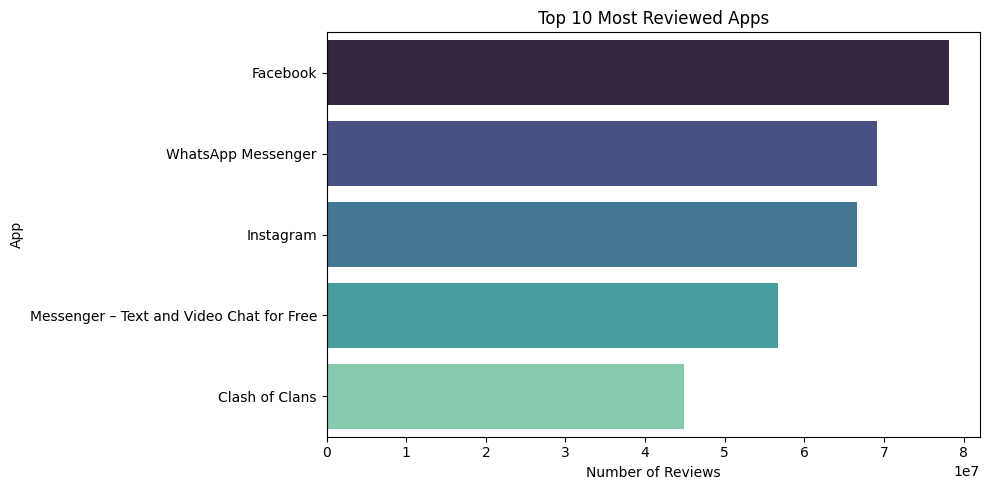

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_review_apps, x='Reviews', y='App', palette='mako')
plt.title('Top 10 Most Reviewed Apps')
plt.xlabel('Number of Reviews')
plt.ylabel('App')
plt.tight_layout()
plt.show()

##### Which category has the highest average number of installs?

In [17]:
avg_installs = df.groupby('Category')['Installs'].mean().sort_values(ascending=False).astype(int).head()
print(avg_installs)

Category
COMMUNICATION    35042146
VIDEO_PLAYERS    24091427
SOCIAL           22961790
ENTERTAINMENT    20722156
PHOTOGRAPHY      16545009
Name: Installs, dtype: int64


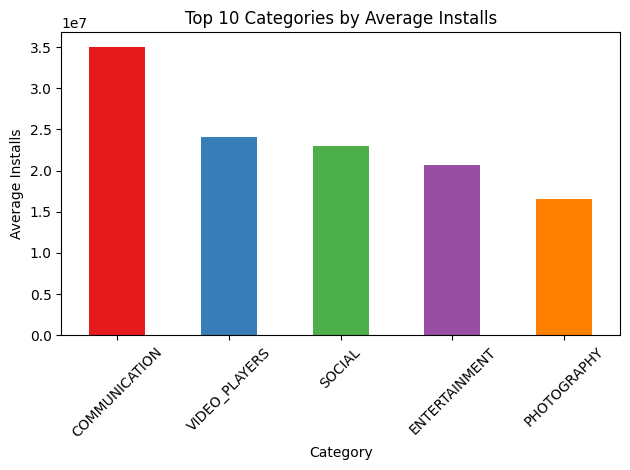

In [18]:
avg_installs.plot(kind='bar', color=colors)
plt.title('Top 10 Categories by Average Installs')
plt.xlabel('Category')
plt.ylabel('Average Installs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Is there any correlation between high ratings and high installs?

In [19]:
df[['Rating', 'Installs']].corr()

,Rating,Installs
Rating,1.00000,0.03431
Installs,0.03431,1.00000


*There is no significant correlation between app ratings and number of installs.*

*Just because an app has a high rating doesn't mean it has more installs and just because an app has a lot of installs doesn’t mean it has a higher rating.*

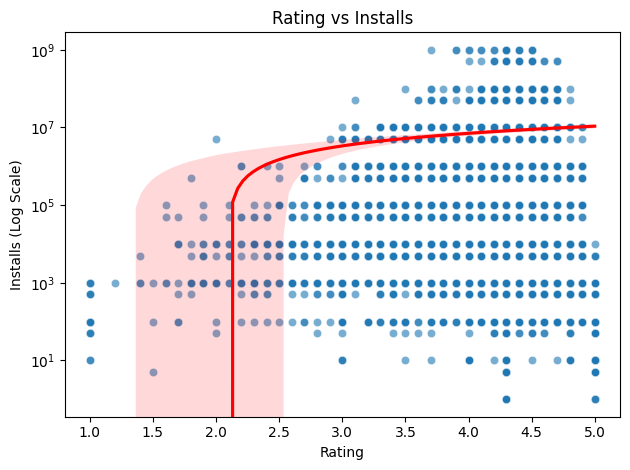

In [20]:
sns.scatterplot(data=df, x='Rating', y='Installs', alpha=0.6)
sns.regplot(data=df, x='Rating', y='Installs', scatter=False, color='red')
plt.yscale('log')
plt.title('Rating vs Installs')
plt.xlabel('Rating')
plt.ylabel('Installs (Log Scale)')
plt.tight_layout()
plt.show()

##### Is there a relationship between size of the app and number of installs?

In [21]:
df[['Size', 'Installs']].corr()

,Size,Installs
Size,1.000000,0.033832
Installs,0.033832,1.000000


*There is almost no linear relationship between the size of an app and how many times it has been installed.*

*Size doesn't play a major role in how popular the app is.*

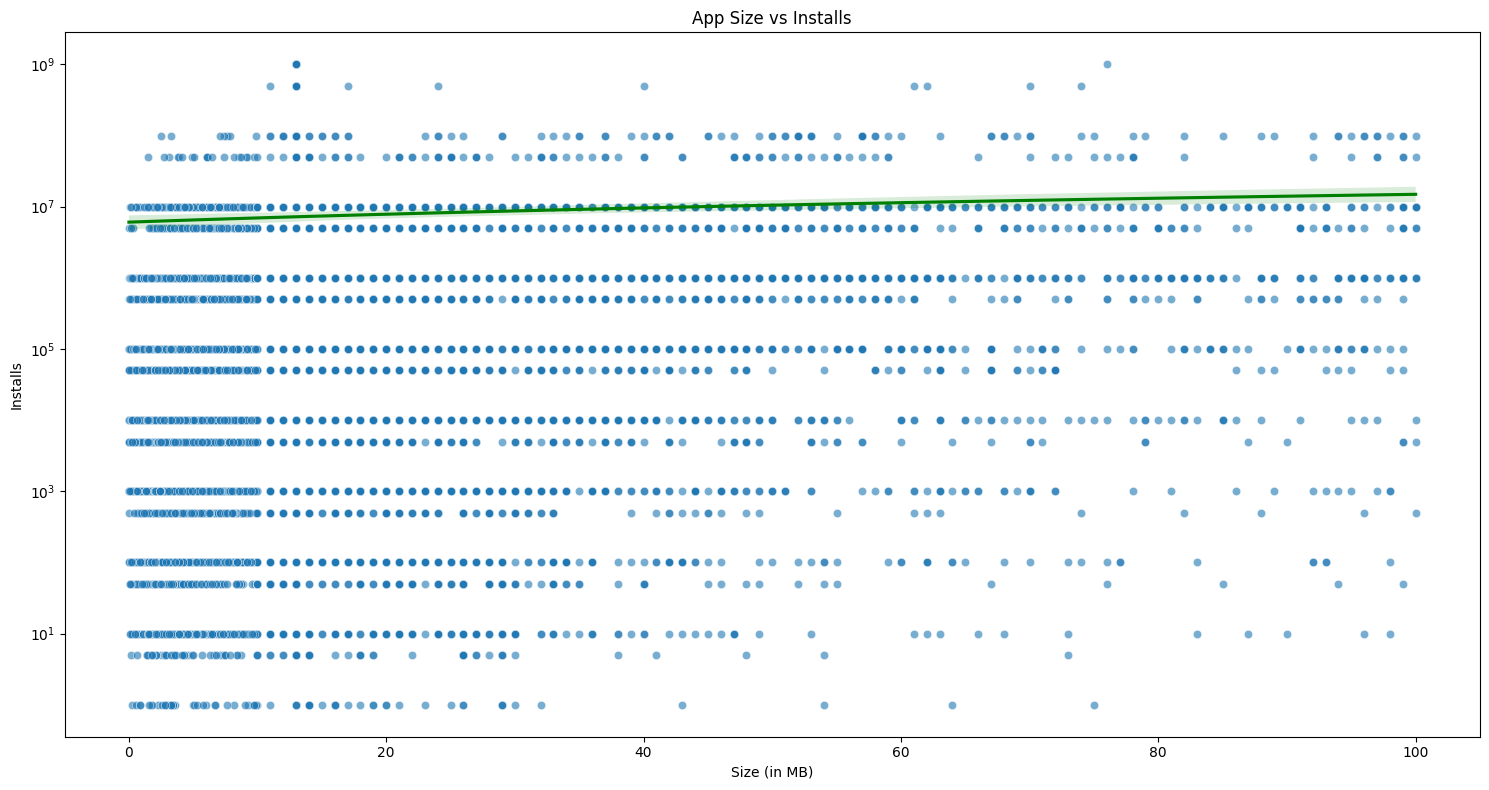

In [22]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='Size', y='Installs', alpha=0.6)
sns.regplot(data=df, x='Size', y='Installs', scatter=False, color='green')
plt.yscale('log')
plt.title('App Size vs Installs')
plt.xlabel('Size (in MB)')
plt.ylabel('Installs')
plt.tight_layout()
plt.show()

## **Ratings Analysis**

##### What is the average rating of apps in each category?

In [23]:
avg_rating_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).round(2)
print(avg_rating_by_category)

Category
EVENTS                 4.40
EDUCATION              4.36
ART_AND_DESIGN         4.35
BOOKS_AND_REFERENCE    4.33
PERSONALIZATION        4.33
PARENTING              4.30
BEAUTY                 4.28
SOCIAL                 4.26
HEALTH_AND_FITNESS     4.25
GAME                   4.25
WEATHER                4.25
SHOPPING               4.24
SPORTS                 4.23
LIBRARIES_AND_DEMO     4.21
PRODUCTIVITY           4.21
AUTO_AND_VEHICLES      4.21
MEDICAL                4.20
FAMILY                 4.19
FOOD_AND_DRINK         4.19
COMICS                 4.19
HOUSE_AND_HOME         4.17
BUSINESS               4.17
PHOTOGRAPHY            4.17
NEWS_AND_MAGAZINES     4.16
COMMUNICATION          4.15
FINANCE                4.14
ENTERTAINMENT          4.14
LIFESTYLE              4.13
TRAVEL_AND_LOCAL       4.10
TOOLS                  4.07
VIDEO_PLAYERS          4.07
MAPS_AND_NAVIGATION    4.06
DATING                 4.04
Name: Rating, dtype: float64


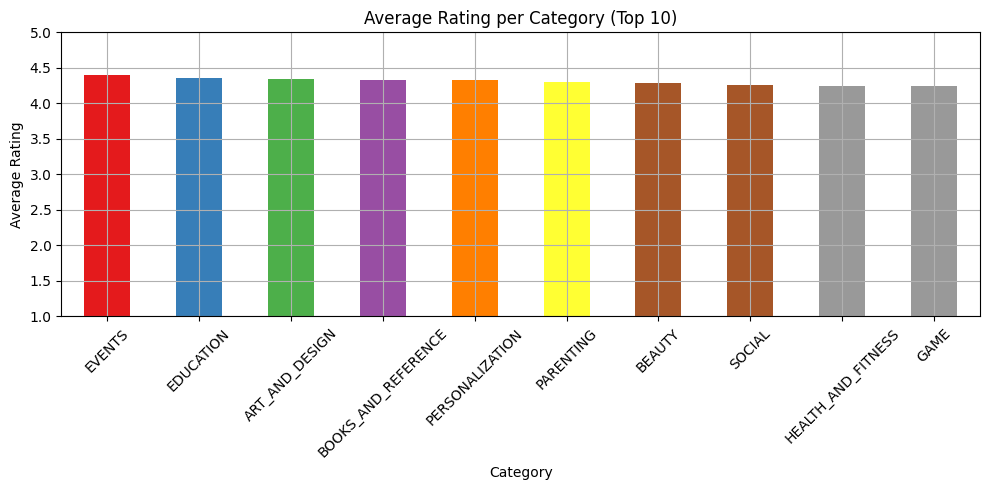

In [24]:
plt.figure(figsize=(10, 5))
avg_rating_by_category.head(10).plot(kind='bar', color=colors)
plt.title('Average Rating per Category (Top 10)')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(1, 5)
plt.tight_layout()
plt.grid()
plt.show()

##### Which app categories have the most apps rated above 4.5?

In [25]:
high_rated_counts = df[df['Rating'] > 4.5]['Category'].value_counts().head(10)
print(high_rated_counts)

Category
FAMILY                 342
GAME                   159
TOOLS                  111
HEALTH_AND_FITNESS      89
LIFESTYLE               81
MEDICAL                 81
PERSONALIZATION         78
FINANCE                 70
BOOKS_AND_REFERENCE     64
PRODUCTIVITY            63
Name: count, dtype: int64


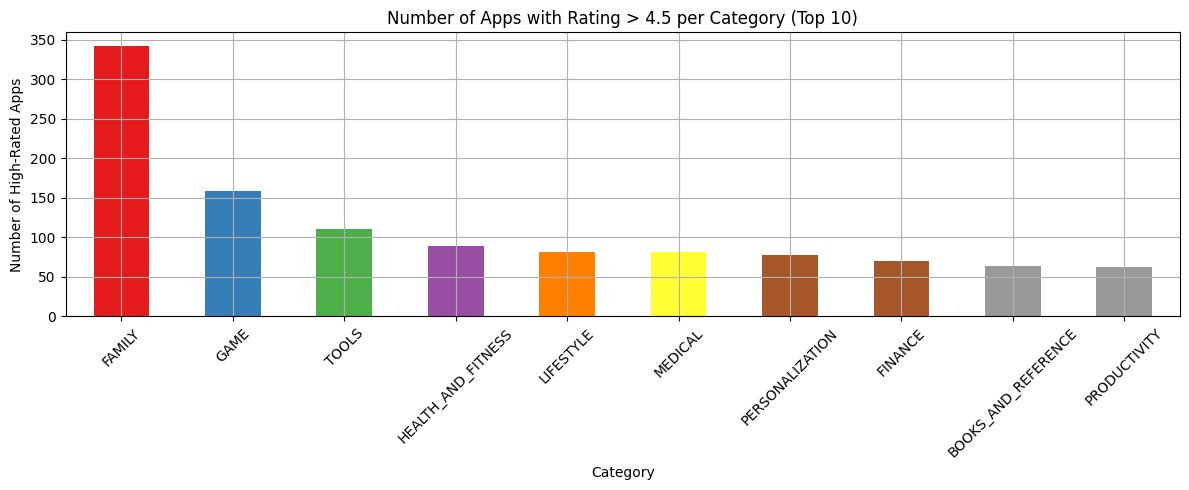

In [26]:
plt.figure(figsize=(12, 5))
high_rated_counts.plot(kind='bar', color=colors)
plt.title('Number of Apps with Rating > 4.5 per Category (Top 10)')
plt.xlabel('Category')
plt.ylabel('Number of High-Rated Apps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

##### Are paid apps rated higher than free apps on average?

In [27]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [28]:
avg_paid_free = df.groupby('Type')['Rating'].mean().round(2)
print(avg_paid_free)

Type
Free    4.19
Paid    4.27
Name: Rating, dtype: float64


*This would mean Paid apps are rated slightly higher on average than Free apps.*

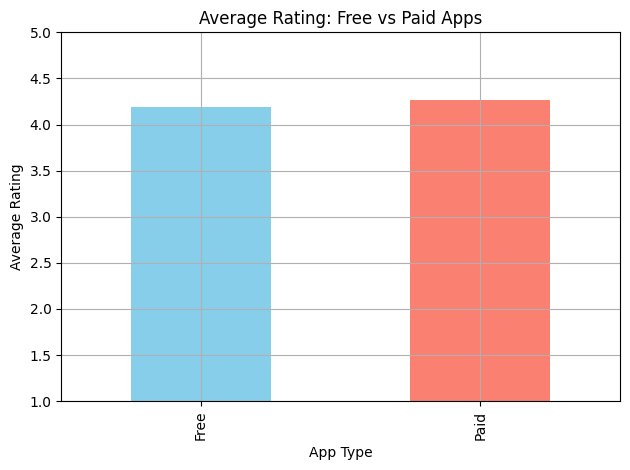

In [29]:
avg_paid_free.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Rating: Free vs Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Average Rating')
plt.ylim(1, 5)
plt.tight_layout()
plt.grid()
plt.show()

## **Free v/s Paid Apps**

##### What percentage of apps are Free vs Paid?

In [30]:
type_counts = df['Type'].value_counts(normalize=True).round(2) * 100
print(type_counts)

Type
Free    92.0
Paid     8.0
Name: proportion, dtype: float64


*This would mean 92.0% of apps are Free, and 8.0% are Paid.*

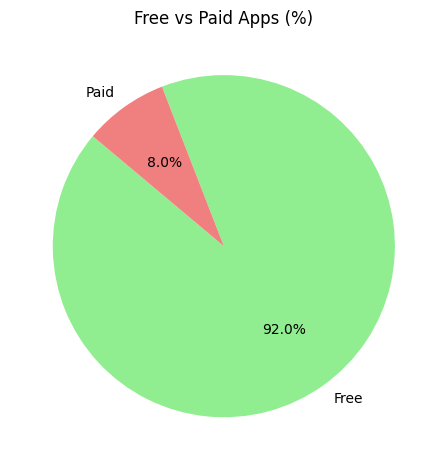

In [31]:
type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Free vs Paid Apps (%)')
plt.ylabel('')
plt.tight_layout()
plt.show()

##### What is the average price of paid apps by category?

In [32]:
paid_apps = df[df['Type'] == 'Paid']

average_price_by_category = paid_apps.groupby('Category')['Price'].mean().sort_values(ascending=False).round(2).head(15)
print(average_price_by_category)

Category
FINANCE                170.64
LIFESTYLE              124.26
EVENTS                 109.99
BUSINESS                14.61
FAMILY                  13.11
MEDICAL                 12.00
PRODUCTIVITY             8.96
PHOTOGRAPHY              6.23
MAPS_AND_NAVIGATION      5.39
SOCIAL                   5.32
PARENTING                4.79
DATING                   4.57
EDUCATION                4.49
AUTO_AND_VEHICLES        4.49
HEALTH_AND_FITNESS       4.29
Name: Price, dtype: float64


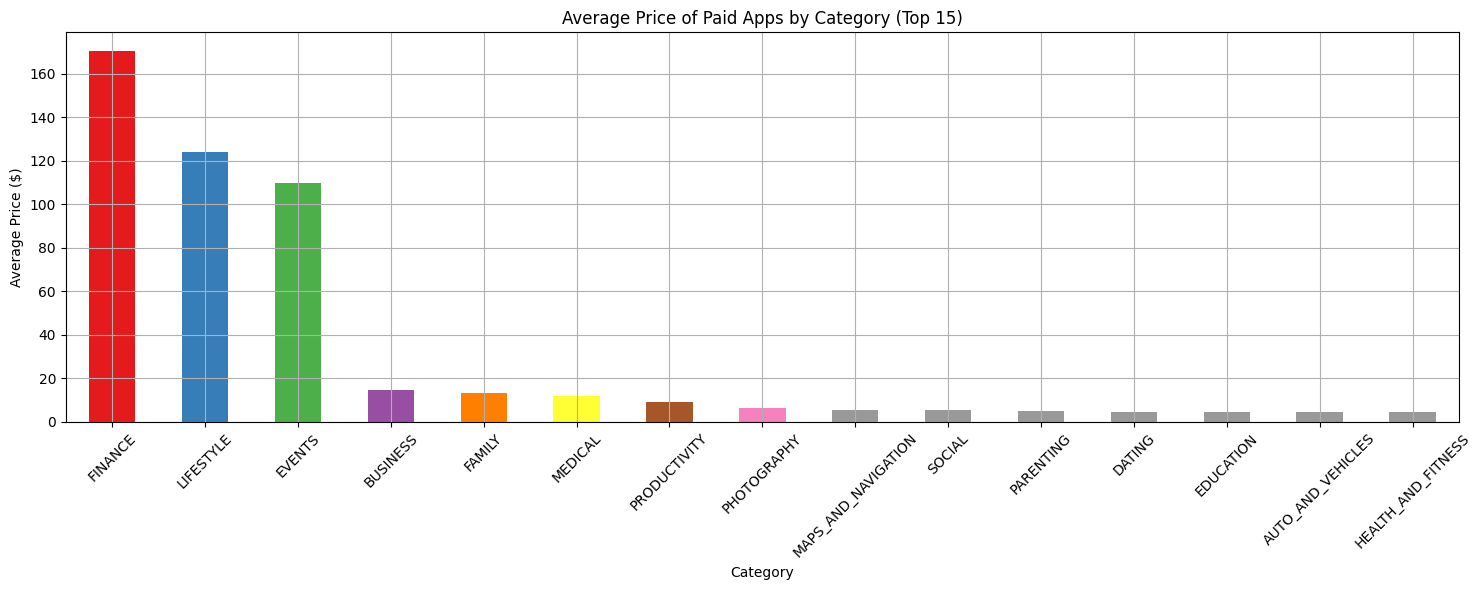

In [33]:
plt.figure(figsize=(15,6))
average_price_by_category.plot(kind='bar', color=plt.colormaps['Set1'](range(15)))
plt.title('Average Price of Paid Apps by Category (Top 15)')
plt.xlabel('Category')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

##### Which are the most expensive apps, and do they have high ratings or installs?

In [34]:
most_expensive = df[df['Type'] == 'Paid'].sort_values('Price', ascending=False).head(10)
most_expensive

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated Date,Last Updated Month,Last Updated Year
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,10000,Paid,400.00,Everyone,2018-05-03,May,2018.0
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4.7,50000,Paid,399.99,Everyone,2017-11-12,November,2017.0
5358,I am Rich!,FINANCE,3.8,93.0,22.0,1000,Paid,399.99,Everyone,2017-12-11,December,2017.0
5362,I Am Rich Pro,FAMILY,4.4,201.0,2.7,5000,Paid,399.99,Everyone,2017-05-30,May,2017.0
5354,I am Rich Plus,FAMILY,4.0,856.0,8.7,10000,Paid,399.99,Everyone,2018-05-19,May,2018.0
5373,I AM RICH PRO PLUS,FINANCE,4.0,36.0,41.0,1000,Paid,399.99,Everyone,2018-06-25,June,2018.0
9933,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.3,0.0,40.0,0,Paid,399.99,Everyone,2017-12-01,December,2017.0
5369,I am Rich,FINANCE,4.3,180.0,3.8,5000,Paid,399.99,Everyone,2018-03-22,March,2018.0
5364,I am rich (Most expensive app),FINANCE,4.1,129.0,2.7,1000,Paid,399.99,Teen,2017-12-06,December,2017.0
4197,most expensive app (H),FAMILY,4.3,6.0,1.5,100,Paid,399.99,Everyone,2018-07-16,July,2018.0


*The most expensive apps (around $400) are novelty apps like “I Am Rich” variants. While they have moderately good ratings (mostly between 3.5 to 4.4), they have very few installs — mostly under 10,000, some even 0 installs.*

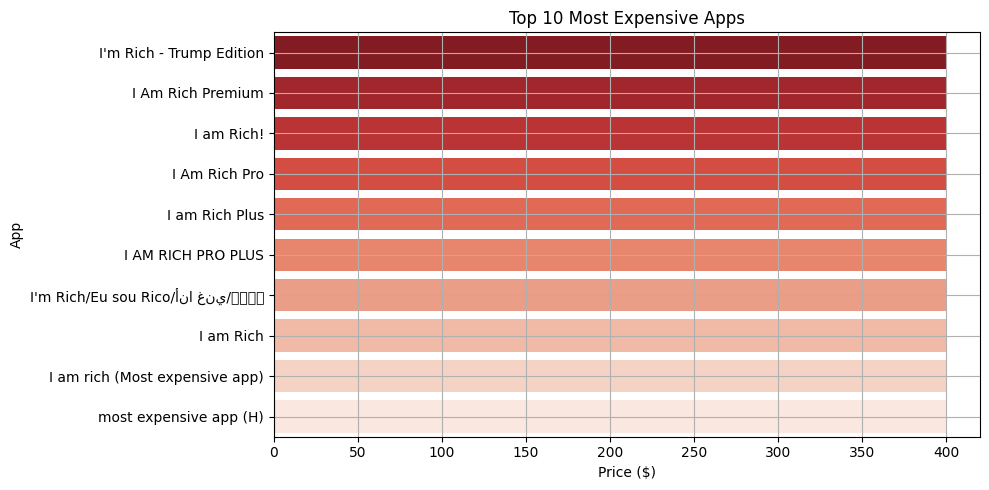

In [35]:
# Bar plot for price
plt.figure(figsize=(10, 5))
sns.barplot(data=most_expensive, x='Price', y='App', palette='Reds_r')
plt.title('Top 10 Most Expensive Apps')
plt.xlabel('Price ($)')
plt.ylabel('App')
plt.tight_layout()
plt.grid()
plt.show()

##### Do paid apps receive more reviews than free apps on average?

In [36]:
avg_reviews = df.groupby('Type')['Reviews'].mean().round(0)
print(avg_reviews)

Type
Free    234270.0
Paid      8725.0
Name: Reviews, dtype: float64


*No, free apps have more reviews than paid apps on average.*

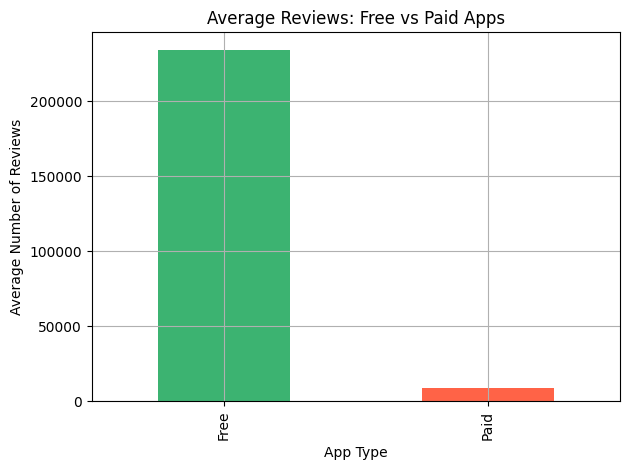

In [37]:
avg_reviews.plot(kind='bar', color=['mediumseagreen', 'tomato'])
plt.title('Average Reviews: Free vs Paid Apps')
plt.xlabel('App Type')
plt.ylabel('Average Number of Reviews')
plt.tight_layout()
plt.grid()
plt.show()

## **Category-Wise Analysis**

##### Which category has the highest number of installs?

In [38]:
total_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
print(total_installs)

Category
GAME                  13878924415
COMMUNICATION         11038276251
TOOLS                  8001771915
PRODUCTIVITY           5793091369
SOCIAL                 5487867902
PHOTOGRAPHY            4649147655
FAMILY                 4427941505
VIDEO_PLAYERS          3926902720
TRAVEL_AND_LOCAL       2894887146
NEWS_AND_MAGAZINES     2369217760
Name: Installs, dtype: int64


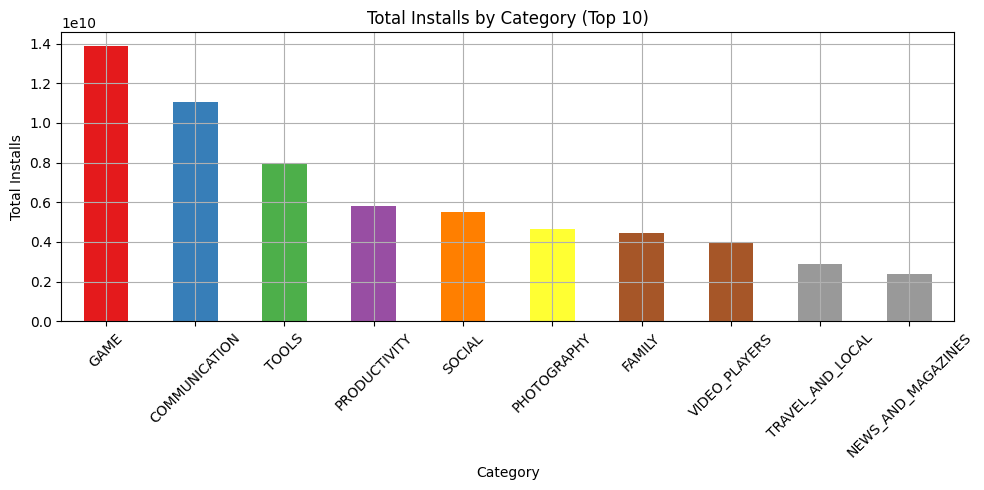

In [39]:
plt.figure(figsize=(10, 5))
total_installs.plot(kind='bar', color=colors)
plt.title('Total Installs by Category (Top 10)')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

## **Update Frequency Trends**

##### Which year had the most app updates?

In [40]:
yearly_updates = df['Last Updated Year'].value_counts().sort_values(ascending=False)
print(yearly_updates)

Last Updated Year
2018.0    6283
2017.0    1794
2016.0     779
2015.0     449
2014.0     203
2013.0     108
2012.0      26
2011.0      15
2010.0       1
Name: count, dtype: int64


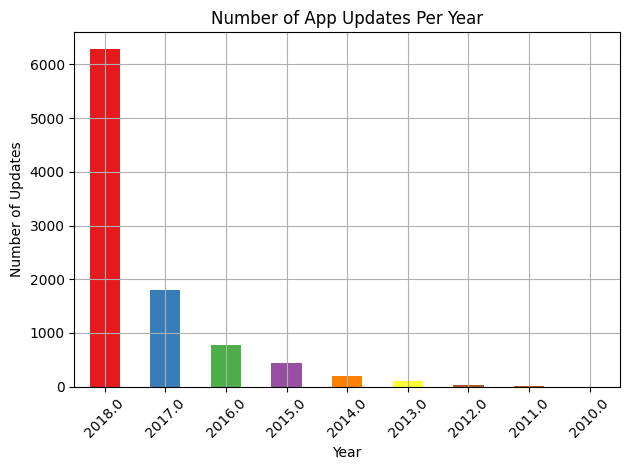

In [41]:
yearly_updates.plot(kind='bar', color=colors) 
plt.title('Number of App Updates Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Updates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

##### Which month and year had the highest number of app updates?

In [42]:
top_updates = df[['Last Updated Month', 'Last Updated Year']].value_counts().sort_values(ascending=False).head(10)
print(top_updates)

Last Updated Month  Last Updated Year
July                2018.0               2320
August              2018.0                977
June                2018.0                912
May                 2018.0                691
March               2018.0                407
April               2018.0                394
February            2018.0                296
January             2018.0                286
December            2017.0                247
October             2017.0                214
Name: count, dtype: int64


In [43]:
top_updates.index = [f'{month} {int(year)}' for month, year in top_updates.index]
top_updates

July 2018        2320
August 2018       977
June 2018         912
May 2018          691
March 2018        407
April 2018        394
February 2018     296
January 2018      286
December 2017     247
October 2017      214
Name: count, dtype: int64

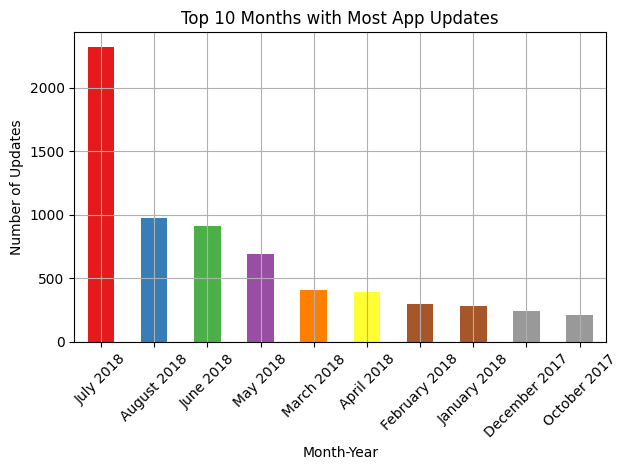

In [44]:
top_updates.plot(kind='bar', color=colors)
plt.title('Top 10 Months with Most App Updates')
plt.xlabel('Month-Year')
plt.ylabel('Number of Updates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

## **Data Quality Checks**

##### Do any apps have missing or anomalous data like extremely high price or negative values?

In [45]:
anomalous_prices = df[df['Price'] > 300][['App', 'Price', 'Rating', 'Installs']]
print(anomalous_prices)

                                    App   Price  Rating  Installs
4197             most expensive app (H)  399.99     4.3       100
4362                         💎 I'm rich  399.99     3.8     10000
4367           I'm Rich - Trump Edition  400.00     3.6     10000
5351                          I am rich  399.99     3.8    100000
5354                     I am Rich Plus  399.99     4.0     10000
5356                  I Am Rich Premium  399.99     4.1     50000
5357                I am extremely Rich  379.99     2.9      1000
5358                         I am Rich!  399.99     3.8      1000
5359                 I am rich(premium)  399.99     3.5      5000
5362                      I Am Rich Pro  399.99     4.4      5000
5364     I am rich (Most expensive app)  399.99     4.1      1000
5366                          I Am Rich  389.99     3.6     10000
5369                          I am Rich  399.99     4.3      5000
5373                 I AM RICH PRO PLUS  399.99     4.0      1000
9916      

In [46]:
negative_prices = df[df['Price'] < 0]
print(negative_prices)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Last Updated Date, Last Updated Month, Last Updated Year]
Index: []


## **Data Insights and Visualization by Bishal**

##### How do app installs vary across different content ratings within each category?

In [47]:
grouped2 = df.groupby(['Category', 'Content Rating'])['Installs'].sum()
top_5_categories = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head().index
top_grouped = grouped2.loc[top_5_categories]

print(top_grouped)

Category       Content Rating 
GAME           Adults only 18+              0
               Everyone            8455429545
               Everyone 10+        2664860050
               Mature 17+           511622210
               Teen                2247012610
               Unrated                      0
COMMUNICATION  Adults only 18+              0
               Everyone           10023549591
               Everyone 10+                 0
               Mature 17+           180110010
               Teen                 834616650
               Unrated                      0
TOOLS          Adults only 18+              0
               Everyone            7941696715
               Everyone 10+                 0
               Mature 17+                5100
               Teen                  60020100
               Unrated                  50000
PRODUCTIVITY   Adults only 18+              0
               Everyone            5783083244
               Everyone 10+              5000
   

##### What is the average rating of Free vs. Paid apps across different categories?

In [80]:
avg_rating_by_cat = df.groupby(['Category', 'Type'])['Rating'].mean().round(2).reset_index()
print(avg_rating_by_cat)

             Category  Type  Rating
0      ART_AND_DESIGN  Free    4.34
1      ART_AND_DESIGN  Paid    4.73
2   AUTO_AND_VEHICLES  Free    4.20
3   AUTO_AND_VEHICLES  Paid    4.40
4              BEAUTY  Free    4.28
..                ...   ...     ...
61   TRAVEL_AND_LOCAL  Paid    4.17
62      VIDEO_PLAYERS  Free    4.07
63      VIDEO_PLAYERS  Paid    4.10
64            WEATHER  Free    4.24
65            WEATHER  Paid    4.36

[66 rows x 3 columns]


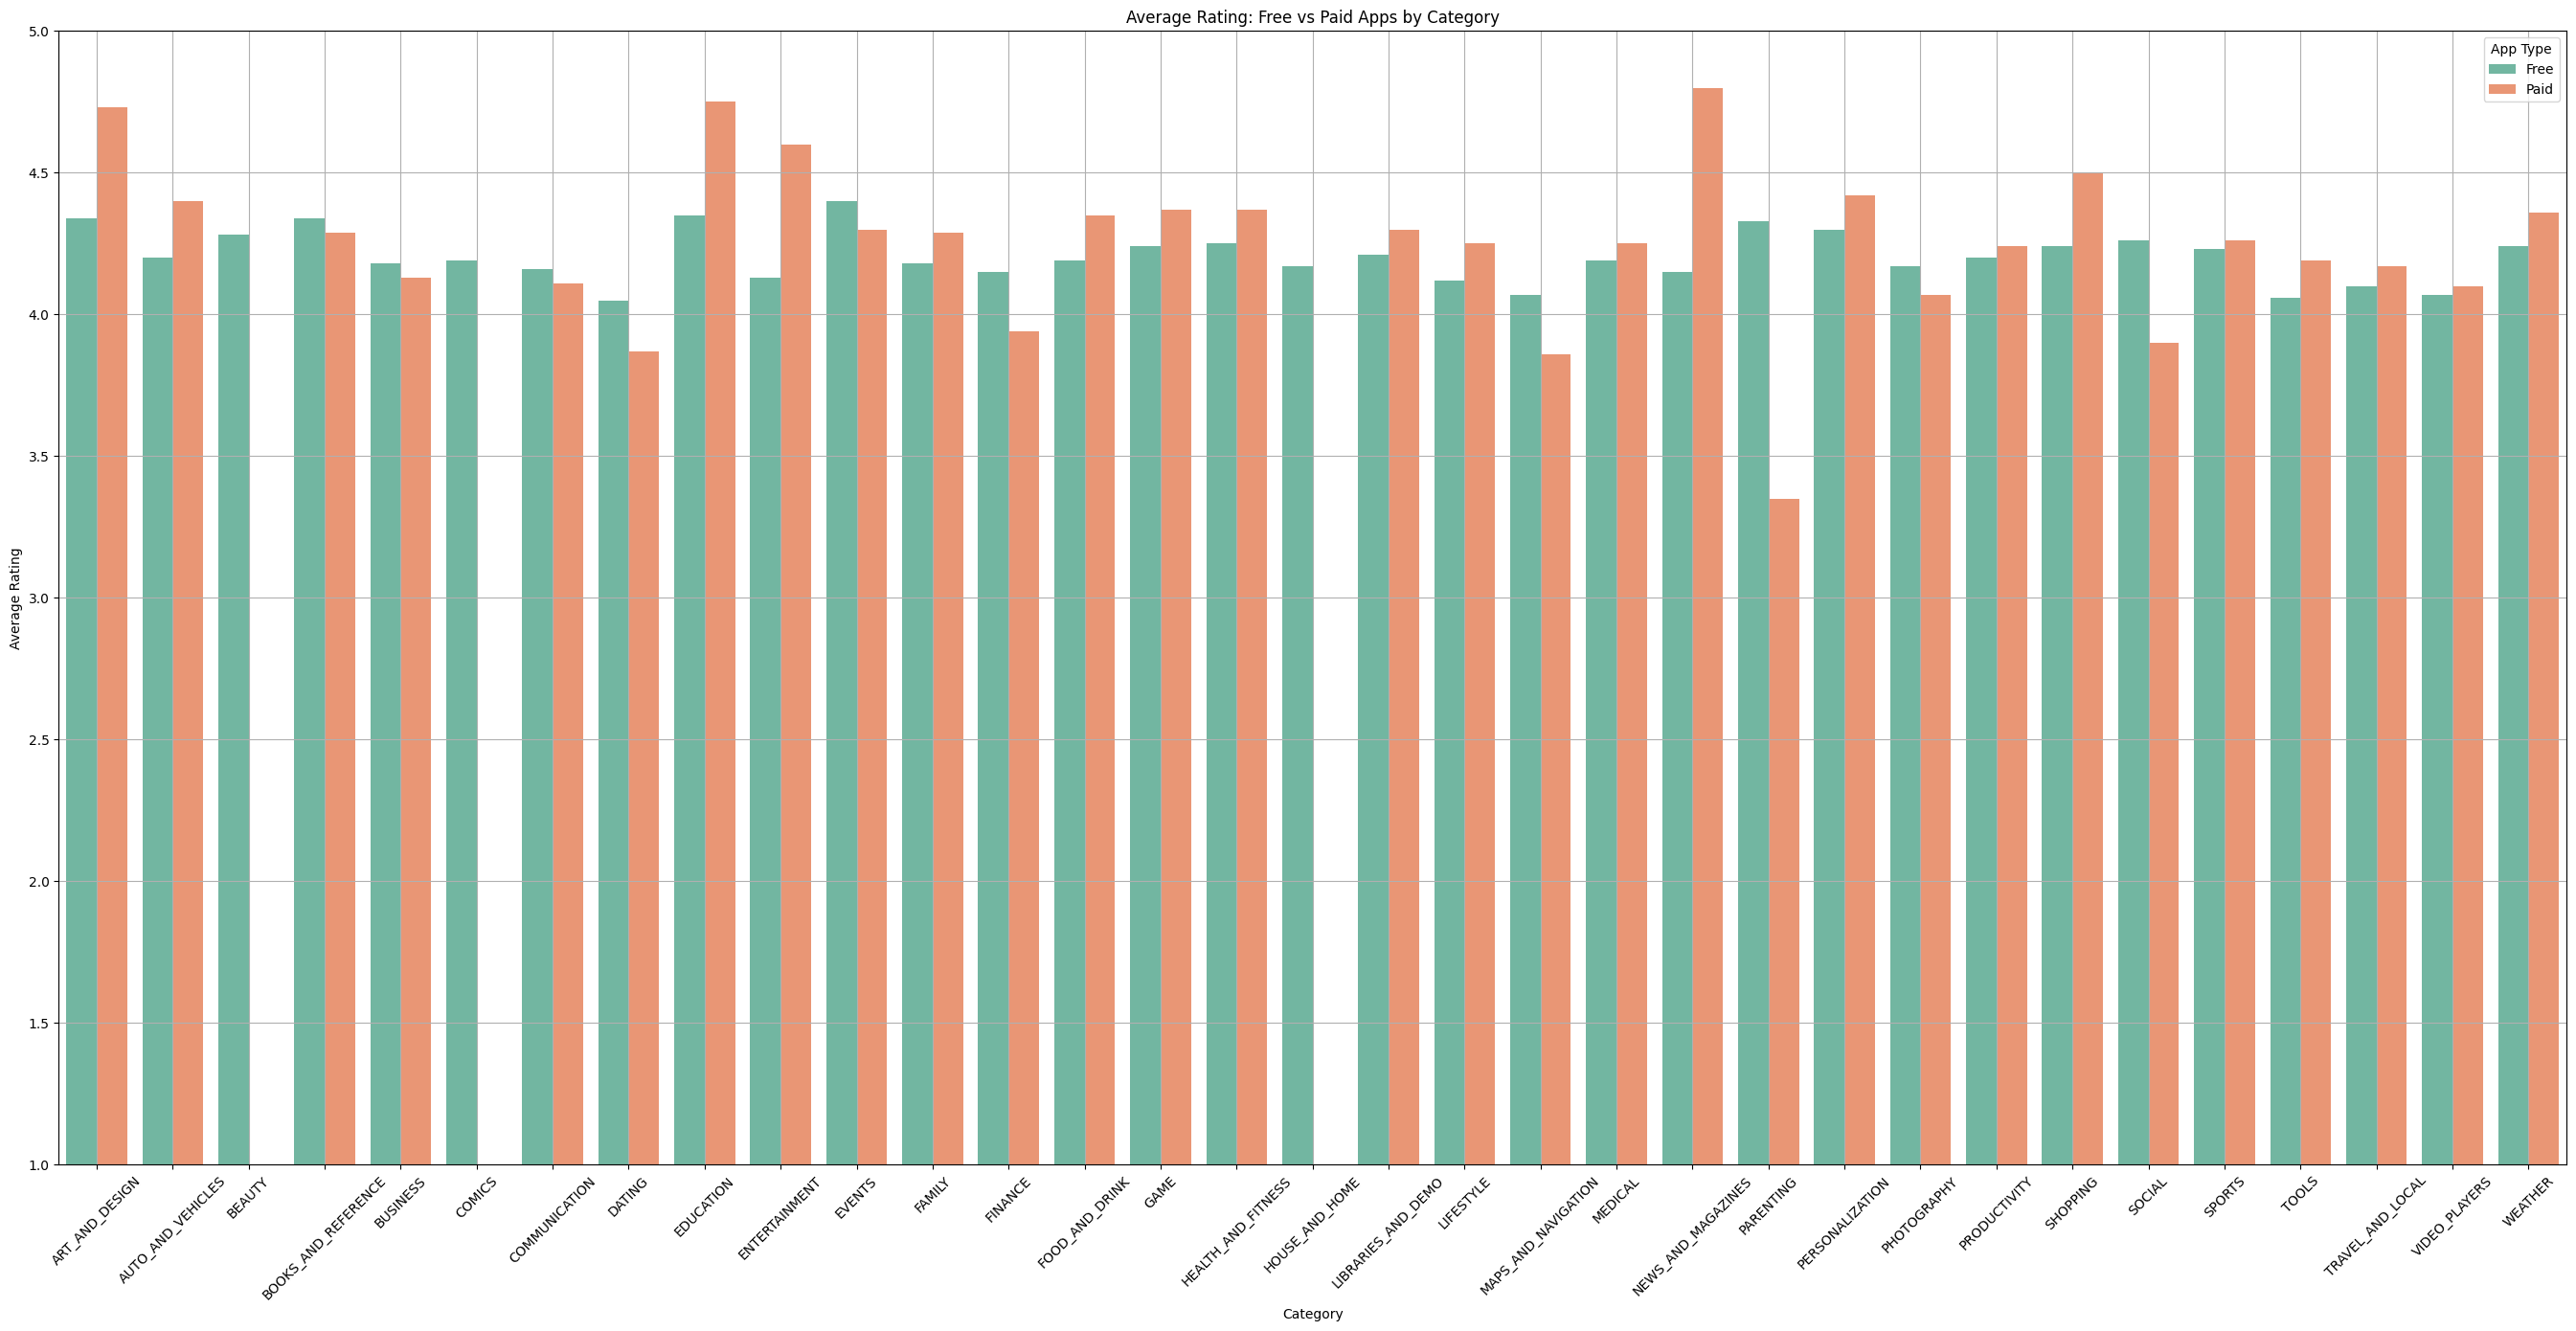

In [76]:
plt.figure(figsize=(27, 14))
sns.barplot(data=avg_rating_by_cat, x='Category', y='Rating', hue='Type', palette='Set2')
plt.title('Average Rating: Free vs Paid Apps by Category')
plt.ylim(1, 5)
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='App Type')
plt.tight_layout()
plt.grid()
plt.show()

##### Boxplot of Ratings per Category:

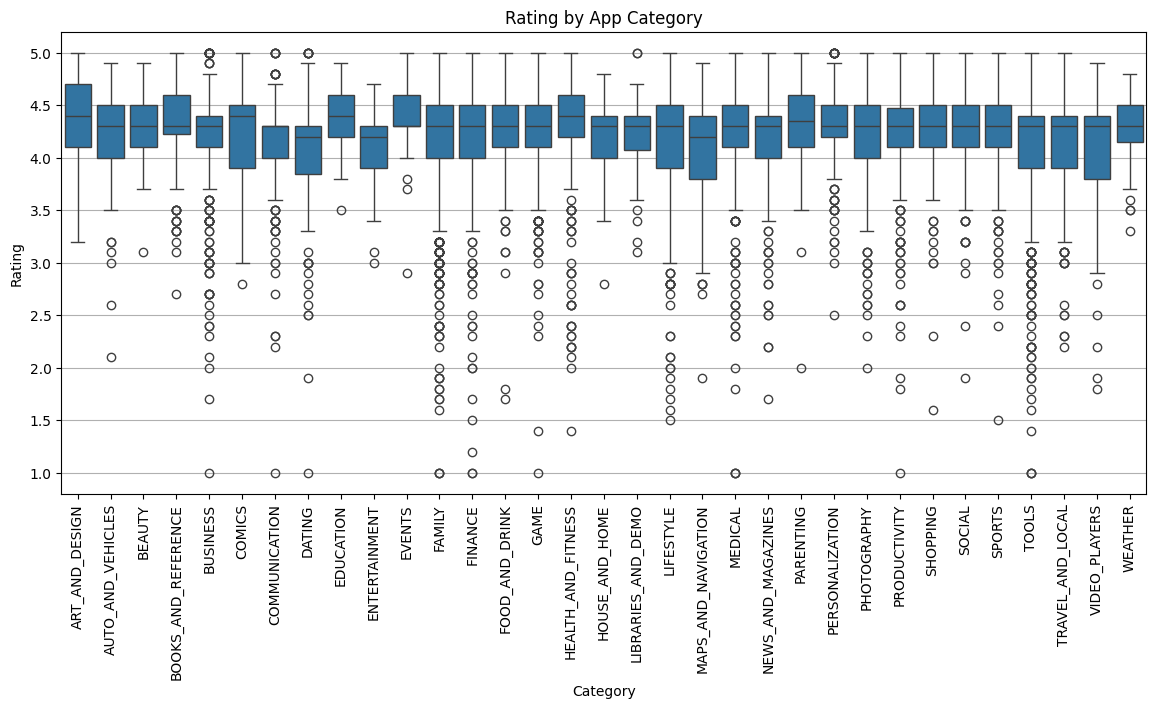

In [49]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Category', y='Rating', data=df)
plt.title('Rating by App Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.show()

##### Correlation Heatmap of Numeric Features:

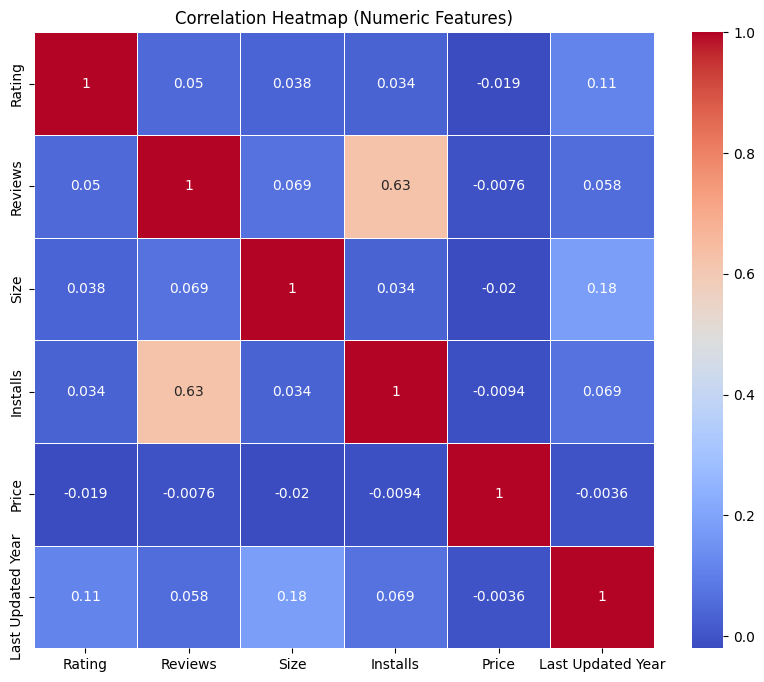

In [50]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()